<a href="https://colab.research.google.com/github/sergiomora03/AdvancedTopicsAnalytics/blob/main/exercises/E11-PatentCitationNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRABAJO EN GRUPO - TÓPICOS AVANZADOS DE ANALÍTICA**

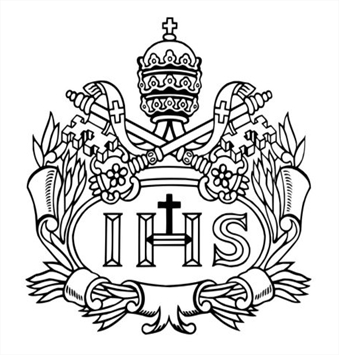

Sonia Ramírez

Anguie García

Mili Galindo

Lourdes Rodill

# Patent Citation Network

U.S. patent dataset is maintained by the [National Bureau of Economic Research](http://www.nber.org/). The data set spans 37 years (January 1, 1963 to December 30, 1999), and includes all the utility patents granted during that period, totaling 3,923,922 patents. The citation graph includes all citations made by patents granted between 1975 and 1999, totaling 16,522,438 citations. For the patents dataset there are 1,803,511 nodes for which we have no information about their citations (we only have the in-links).

The data was originally released by [NBER](http://www.nber.org/patents/). The dataset can be found at this link: [Stanford Patent Citation Network](https://snap.stanford.edu/data/cit-Patents.html)

## Import Packages

In [143]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

## Import data

In [144]:
patent = pd.read_csv(
    "http://snap.stanford.edu/data/cit-Patents.txt.gz",
    compression="gzip",
    sep="\t",
    names=["start_node", "end_node"],
    skiprows=5
)

In [145]:
patent.head()

,start_node,end_node
0,3858241,1324234
1,3858241,3398406
2,3858241,3557384
3,3858241,3634889
4,3858242,1515701


In [146]:
patent.shape

(16518947, 2)

Se observa que el dataset "Patent" tiene más de 16 millones de registros.

**Muestra Dataset**

In [147]:
# Ya que el conjunto de datos es muy grande, trabajaremos con una muestra del 0.12%
sample_patent = patent.sample(frac=0.00012, random_state=123)

In [148]:
sample_patent.shape

(1982, 2)

Ahora tenemos un dataset con 1.982 registros.

## Build Recommendation System

build a recommendation system based on Node2Vec with the patent information, remember to do a descriptive analysis and apply visualizations.

Also, remember that when making a recommendation about which patent should be associated with another, make a visualization of the recommendation.

In [149]:
Grafo = nx.DiGraph()
Grafo.add_edges_from(sample_patent.values)

# **Análisis Descriptivo y Visualizaciones**

In [150]:
#Numero de nodos y aristas
num_nodos = Grafo.number_of_nodes()
num_aristas = Grafo.number_of_edges()
print(f"Número de nodos: {num_nodos}")
print(f"Número de aristas: {num_aristas}")

Número de nodos: 3959
Número de aristas: 1982


In [151]:
# Grado de los Nodos
grados = dict(Grafo.degree())
print(f"Grado de los nodos: {grados}")

Grado de los nodos: {4159373: 1, 3766176: 1, 5760604: 1, 5208491: 1, 4756572: 1, 3637184: 1, 5482249: 1, 4271866: 1, 3939926: 1, 3526285: 1, 3897758: 1, 879707: 1, 3950821: 1, 3751764: 1, 4817555: 1, 2924192: 1, 4140039: 1, 3544693: 1, 4592590: 1, 2490823: 1, 4309591: 1, 4212631: 1, 5036365: 1, 3287244: 1, 5038774: 1, 4219017: 1, 5888332: 1, 5449425: 1, 5690382: 1, 3802527: 1, 4683831: 1, 2677863: 1, 4047550: 1, 2741287: 1, 4108990: 1, 2867566: 1, 4145105: 1, 2725543: 1, 5887115: 1, 4584613: 1, 5550746: 1, 4071911: 1, 5928999: 1, 4008249: 1, 5729013: 1, 5166747: 1, 4460913: 1, 4322736: 1, 3963532: 1, 3813240: 1, 5952612: 1, 3138657: 1, 4455121: 1, 4151709: 1, 4057727: 1, 3573458: 1, 4271647: 1, 3106227: 1, 5884605: 1, 5752485: 1, 4888494: 1, 4001810: 1, 5807871: 1, 4358456: 1, 3919013: 1, 3369943: 1, 4162857: 1, 3445091: 1, 4149457: 1, 3603247: 1, 5093784: 1, 4484261: 1, 5268377: 1, 4686226: 1, 5980322: 1, 5505633: 1, 5678582: 1, 2652843: 1, 4624352: 1, 2179568: 1, 5074175: 1, 4571808:

In [152]:
# Grado Promedio
grado_promedio = sum(dict(Grafo.degree()).values()) / Grafo.number_of_nodes()
print(f"Grado promedio: {grado_promedio}")

Grado promedio: 1.001262945188179


El grado promedio de los nodos nos muestra que para el dataset analizado, el número promedio de aristas o enlaces que tienen los nodos es 1.

In [153]:
# Centralidad de cercanía
centralidad_cercania = nx.closeness_centrality(Grafo)
print(f"Centralidad de cercanía: {centralidad_cercania}")


Centralidad de cercanía: {4159373: 0.0, 3766176: 0.00025265285497726126, 5760604: 0.0, 5208491: 0.00025265285497726126, 4756572: 0.0, 3637184: 0.00025265285497726126, 5482249: 0.0, 4271866: 0.00025265285497726126, 3939926: 0.0, 3526285: 0.00025265285497726126, 3897758: 0.0, 879707: 0.00025265285497726126, 3950821: 0.0, 3751764: 0.00025265285497726126, 4817555: 0.0, 2924192: 0.00025265285497726126, 4140039: 0.0, 3544693: 0.00025265285497726126, 4592590: 0.0, 2490823: 0.00025265285497726126, 4309591: 0.0, 4212631: 0.00025265285497726126, 5036365: 0.0, 3287244: 0.00025265285497726126, 5038774: 0.0, 4219017: 0.00025265285497726126, 5888332: 0.0, 5449425: 0.00025265285497726126, 5690382: 0.0, 3802527: 0.00025265285497726126, 4683831: 0.0, 2677863: 0.00025265285497726126, 4047550: 0.0, 2741287: 0.00025265285497726126, 4108990: 0.0, 2867566: 0.00025265285497726126, 4145105: 0.0, 2725543: 0.00025265285497726126, 5887115: 0.0, 4584613: 0.00025265285497726126, 5550746: 0.0, 4071911: 0.0002526528

In [154]:
# Coeficiente de asortatividad
coeficiente_asortatividad = nx.degree_assortativity_coefficient(Grafo)
print(f"Coeficiente de asortatividad: {coeficiente_asortatividad}")


Coeficiente de asortatividad: -0.0020222446916199643


Un coeficiente de asortatividad negativo nos muestra que no hay una tendencia de los nodos a conectar con otros nodos de grado similar.

In [155]:
# Densidad del grafo
densidad = nx.density(Grafo)
print(f"Densidad del grafo: {densidad}")


Densidad del grafo: 0.0001264859708423672


# **Visualización del grafo**

(-1.2059069022536277,
 1.2067787393927574,
 -1.2056536918878555,
 1.2095870023965836)

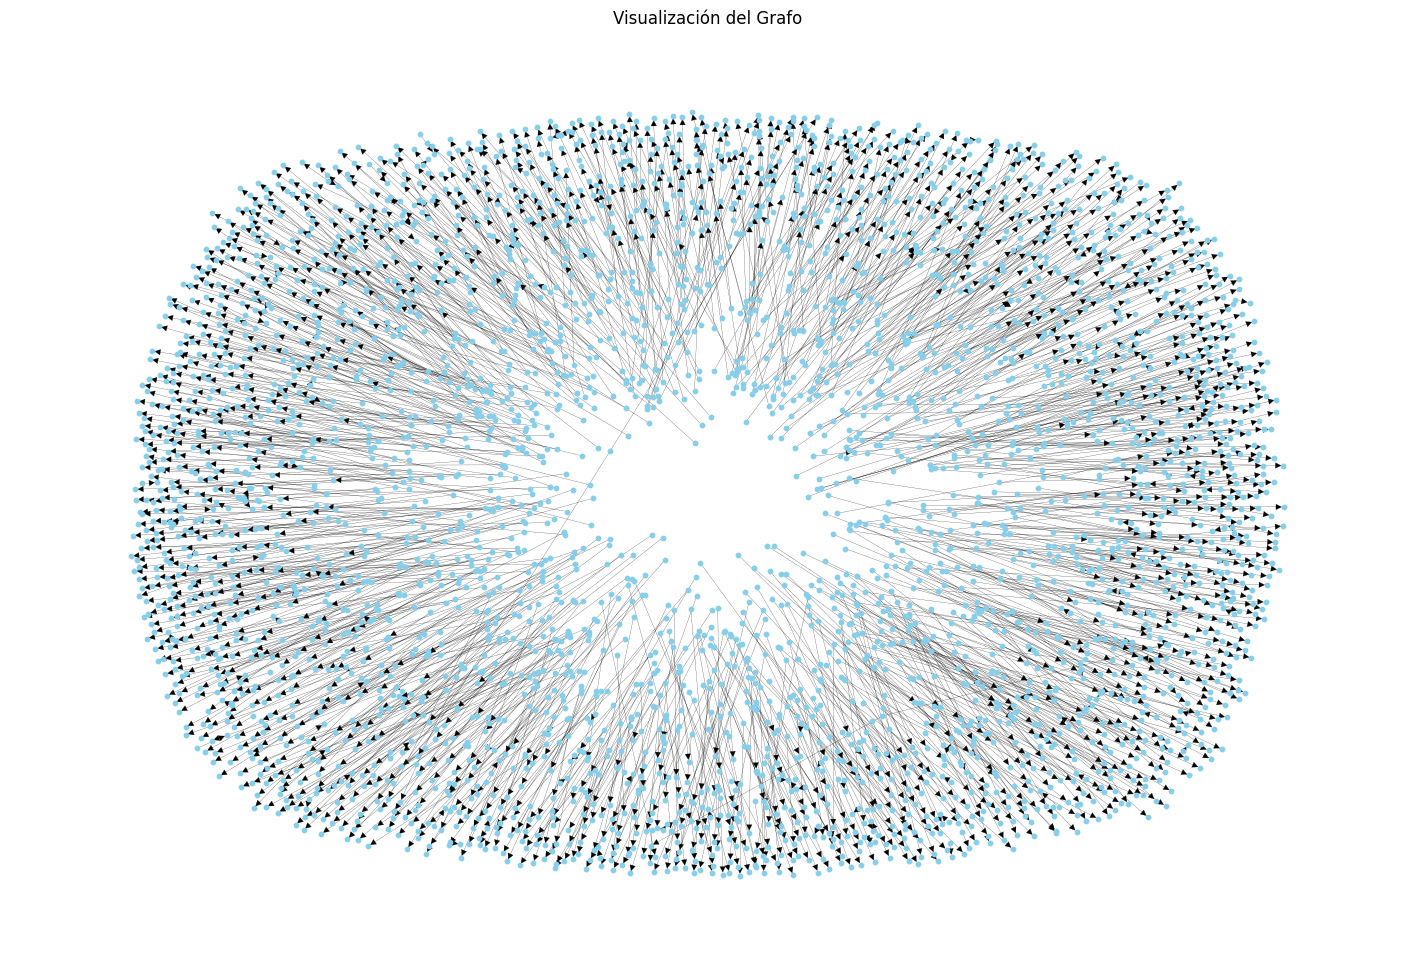

In [156]:
# Dibujar el grafo
plt.figure(figsize = (18, 12))
pos = nx.spring_layout(Grafo, iterations = 15, seed = 1234)
nx.draw_networkx(Grafo,
                 pos,
                 node_size = 10,
                 with_labels = False,
                 node_color='skyblue',
                 edge_color='k',
                 width = 0.15
                 )

# Mostrar la visualización
plt.title("Visualización del Grafo")
plt.axis("off")



In [157]:
#Importamos librería Node2Vec para la generación de los embeddings
!pip install node2vec
from node2vec import Node2Vec

In [158]:
# Representaciones vectoriales nodos
node2vec = Node2Vec(Grafo, dimensions=64, walk_length=20, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/3959 [00:00<?, ?it/s]

# **Recomendaciones**

Ahora vamos a explorar la similitud entre los nodos en el grafo utilizando las representaciones vectoriales aprendidas por Node2Vec.

In [159]:
import random

# Lista de todos los nodos en el Grafo
nodos_grafo = list(Grafo.nodes)

# Seleccionar un nodo aleatorio
random.seed(150)
nodo_1 = random.choice(nodos_grafo)

similar_nodos = model.wv.most_similar(str(nodo_1), topn=15)

print(f"Nodo seleccionado: {nodo_1}")
print("Nodos más similares:")
for nodo, similitud in similar_nodos:
    print(f"  Nodo: {nodo}, Similitud: {similitud}")

Nodo seleccionado: 4302987
Nodos más similares:
  Nodo: 2835154, Similitud: 0.6621849536895752
  Nodo: 4051609, Similitud: 0.6513990163803101
  Nodo: 4525177, Similitud: 0.6395122408866882
  Nodo: 4202035, Similitud: 0.6362469792366028
  Nodo: 3160327, Similitud: 0.6348285675048828
  Nodo: 5319768, Similitud: 0.6212925314903259
  Nodo: 5318771, Similitud: 0.62099289894104
  Nodo: 5279394, Similitud: 0.6082355380058289
  Nodo: 4227903, Similitud: 0.6082154512405396
  Nodo: 4096311, Similitud: 0.6067702770233154
  Nodo: 5781956, Similitud: 0.6021243929862976
  Nodo: 3646161, Similitud: 0.6005290746688843
  Nodo: 4535766, Similitud: 0.5991829633712769
  Nodo: 3391503, Similitud: 0.5938226580619812
  Nodo: 4386399, Similitud: 0.5920974016189575


# **Visualización del grafo con recomendaciones**

In [160]:
recomendaciones = [int(nodo) for nodo, _ in similar_nodos]
Grafo2 = Grafo.subgraph([nodo_1] + recomendaciones)

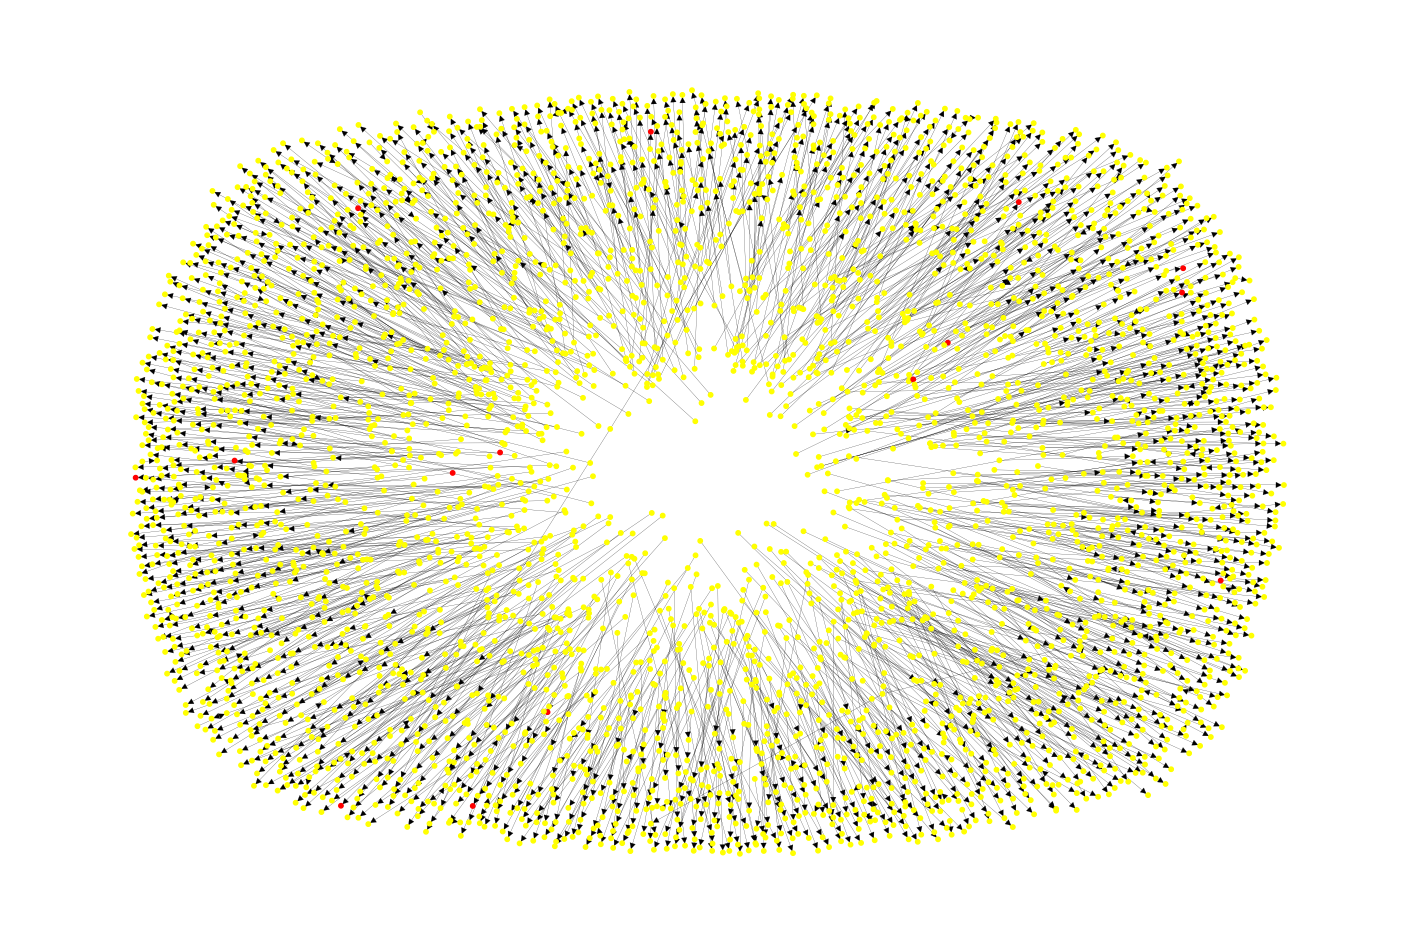

In [161]:
# Visuaización de las recomendaciones
color_map = []
size_map = []
for node in Grafo:
    if nodo == nodo_1:
        color_map.append('blue')
    elif node in [int(sim_node) for sim_node, _ in similar_nodos]:
        color_map.append('red')
        size_map.append(150)
    else:
        color_map.append('yellow')
        size_map.append(10)

plt.figure(figsize=(18, 12))
plt.axis("off")
pos = nx.spring_layout(Grafo, iterations=15, seed=1234)
nx.draw_networkx(Grafo, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=color_map)

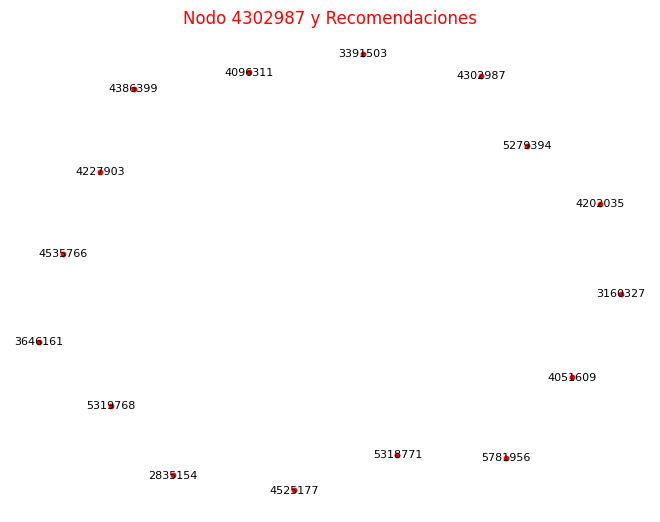

Nodo seleccionado: 4302987
Nodos más similares:
  Nodo: 2835154, Similitud: 0.6621849536895752
  Nodo: 4051609, Similitud: 0.6513990163803101
  Nodo: 4525177, Similitud: 0.6395122408866882
  Nodo: 4202035, Similitud: 0.6362469792366028
  Nodo: 3160327, Similitud: 0.6348285675048828
  Nodo: 5319768, Similitud: 0.6212925314903259
  Nodo: 5318771, Similitud: 0.62099289894104
  Nodo: 5279394, Similitud: 0.6082355380058289
  Nodo: 4227903, Similitud: 0.6082154512405396
  Nodo: 4096311, Similitud: 0.6067702770233154
  Nodo: 5781956, Similitud: 0.6021243929862976
  Nodo: 3646161, Similitud: 0.6005290746688843
  Nodo: 4535766, Similitud: 0.5991829633712769
  Nodo: 3391503, Similitud: 0.5938226580619812
  Nodo: 4386399, Similitud: 0.5920974016189575


In [162]:
recomendaciones = [int(nodo) for nodo, _ in similar_nodos]
Grafo2 = Grafo.subgraph([nodo_1] + recomendaciones)
pos_Grafo2 = nx.spring_layout(Grafo2)
nx.draw(Grafo2, pos_Grafo2, with_labels=True, font_size=8 ,node_size=10, node_color='r')
plt.title(f"Nodo {nodo_1} y Recomendaciones", color='red')
plt.show()

print(f"Nodo seleccionado: {nodo_1}")
print("Nodos más similares:")
for nodo, similitud in similar_nodos:
    print(f"  Nodo: {nodo}, Similitud: {similitud}")

In [163]:
nodo_2 = random.choice(nodos_grafo)
similar_nodos2 = model.wv.most_similar(str(nodo_2), topn=15)

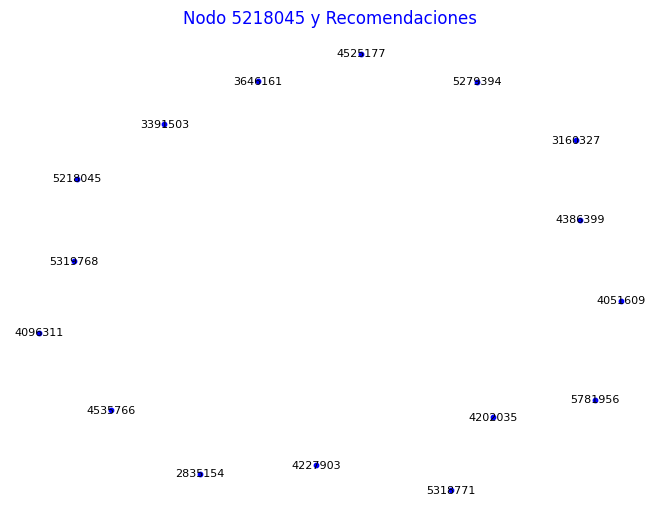

Nodo seleccionado: 5218045
Nodos más similares:
  Nodo: 2835154, Similitud: 0.6621849536895752
  Nodo: 4051609, Similitud: 0.6513990163803101
  Nodo: 4525177, Similitud: 0.6395122408866882
  Nodo: 4202035, Similitud: 0.6362469792366028
  Nodo: 3160327, Similitud: 0.6348285675048828
  Nodo: 5319768, Similitud: 0.6212925314903259
  Nodo: 5318771, Similitud: 0.62099289894104
  Nodo: 5279394, Similitud: 0.6082355380058289
  Nodo: 4227903, Similitud: 0.6082154512405396
  Nodo: 4096311, Similitud: 0.6067702770233154
  Nodo: 5781956, Similitud: 0.6021243929862976
  Nodo: 3646161, Similitud: 0.6005290746688843
  Nodo: 4535766, Similitud: 0.5991829633712769
  Nodo: 3391503, Similitud: 0.5938226580619812
  Nodo: 4386399, Similitud: 0.5920974016189575


In [164]:
recomendaciones2 = [int(nodo) for nodo, _ in similar_nodos]
Grafo3 = Grafo.subgraph([nodo_2] + recomendaciones2)
pos_Grafo3 = nx.spring_layout(Grafo3)
nx.draw(Grafo3, pos_Grafo3, with_labels=True, font_size=8, node_size=10, node_color='b')
plt.title(f"Nodo {nodo_2} y Recomendaciones", color='blue')
plt.show()

print(f"Nodo seleccionado: {nodo_2}")
print("Nodos más similares:")
for nodo, similitud in similar_nodos:
    print(f"  Nodo: {nodo}, Similitud: {similitud}")